In [1]:
!pip install dabl

In [2]:
!pip install kmodes

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dabl

from kmodes.kmodes import KModes

%matplotlib inline

C:\Users\VAISSHET\Anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Data Preprocessing 

In [4]:
dataset = pd.read_csv('../data/V2_Dummy-Data.csv')

In [5]:
dataset.head(10)

,Unnamed: 0,Device_type,Device_ID,Device_brand,Device_model,Manufacture_Date,Allocation_Date,device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms)
0,0,Laptop,37236403,Apple,ProBook,2019-07-15,2021-08-05,No,No,Yes,Poor,1.60,Poor
1,1,Laptop,27710104,Apple,ProBook,2015-04-27,2021-01-22,No,No,Yes,Poor,1.97,Good
2,2,Feature Phone,79122931,Nokia,5310,2015-08-31,2021-02-15,Yes,No,Yes,Average,7.53,Average
3,3,Laptop,4498605,Dell,Vostro,2018-09-30,2021-08-08,No,No,No,Good,1.62,Good
4,4,Feature Phone,78132818,Samsung,6300,2018-10-01,2021-08-09,Yes,No,Yes,Average,3.51,Average
5,5,Smart Phone,91237507,Samsung,Galaxy S9,2014-07-23,2021-05-19,Yes,No,Yes,Good,17.98,Good
6,6,Laptop,20450687,HP,Probook,2014-09-26,2021-05-22,No,Yes,Yes,Average,4.10,Average
7,7,Feature Phone,1575712,Nokia,8000,2015-09-19,2021-07-20,No,Yes,No,Average,5.10,Good
8,8,Smart Phone,57476209,OnePlus,OnePlus nord,2014-11-21,2021-06-21,No,No,No,Good,2.63,Average
9,9,Smart Phone,4458463,Samsung,Galaxy S9,2016-06-25,2021-03-31,Yes,No,Yes,Good,4.52,Poor


In [6]:
dataset.tail(10)

,Unnamed: 0,Device_type,Device_ID,Device_brand,Device_model,Manufacture_Date,Allocation_Date,device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms)
9990,9990,Smart Phone,90900723,Apple,Iphone XR,2016-05-09,2021-05-26,No,No,No,Average,6.42,Average
9991,9991,Smart Phone,83653384,Samsung,Galaxy J7 duo,2018-07-22,2021-06-30,Yes,No,Yes,Good,10.89,Poor
9992,9992,Laptop,16636729,Dell,Vostro,2019-08-30,2021-02-27,Yes,No,Yes,Poor,2.66,Good
9993,9993,Smart Phone,67021543,Nokia,G50,2015-01-14,2021-03-11,Yes,No,Yes,Average,1.84,Good
9994,9994,Feature Phone,30704664,Nokia,6300,2016-04-23,2021-03-05,Yes,No,Yes,Good,5.86,Average
9995,9995,Smart Phone,93875714,Samsung,Galaxy Note 9,2017-01-23,2021-04-13,No,Yes,No,Average,6.60,Poor
9996,9996,Smart Phone,74401284,OnePlus,OnePlus 7T,2018-04-23,2021-04-06,No,Yes,No,Average,2.26,Average
9997,9997,Feature Phone,99670115,Nokia,125,2015-08-02,2021-06-23,Yes,Yes,Yes,Poor,4.59,Good
9998,9998,Smart Phone,37201685,Apple,Iphone 5S,2014-08-09,2021-07-30,No,No,Yes,Average,5.11,Poor
9999,9999,Feature Phone,17332248,Nokia,215,2015-03-23,2021-07-22,No,Yes,No,Good,10.38,Poor


In [7]:
dataset.drop('Unnamed: 0', axis='columns', inplace=True)

In [8]:
dataset.head(10)

,Device_type,Device_ID,Device_brand,Device_model,Manufacture_Date,Allocation_Date,device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms)
0,Laptop,37236403,Apple,ProBook,2019-07-15,2021-08-05,No,No,Yes,Poor,1.60,Poor
1,Laptop,27710104,Apple,ProBook,2015-04-27,2021-01-22,No,No,Yes,Poor,1.97,Good
2,Feature Phone,79122931,Nokia,5310,2015-08-31,2021-02-15,Yes,No,Yes,Average,7.53,Average
3,Laptop,4498605,Dell,Vostro,2018-09-30,2021-08-08,No,No,No,Good,1.62,Good
4,Feature Phone,78132818,Samsung,6300,2018-10-01,2021-08-09,Yes,No,Yes,Average,3.51,Average
5,Smart Phone,91237507,Samsung,Galaxy S9,2014-07-23,2021-05-19,Yes,No,Yes,Good,17.98,Good
6,Laptop,20450687,HP,Probook,2014-09-26,2021-05-22,No,Yes,Yes,Average,4.10,Average
7,Feature Phone,1575712,Nokia,8000,2015-09-19,2021-07-20,No,Yes,No,Average,5.10,Good
8,Smart Phone,57476209,OnePlus,OnePlus nord,2014-11-21,2021-06-21,No,No,No,Good,2.63,Average
9,Smart Phone,4458463,Samsung,Galaxy S9,2016-06-25,2021-03-31,Yes,No,Yes,Good,4.52,Poor


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Device_type        10000 non-null  object 
 1   Device_ID          10000 non-null  int64  
 2   Device_brand       10000 non-null  object 
 3   Device_model       10000 non-null  object 
 4   Manufacture_Date   10000 non-null  object 
 5   Allocation_Date    10000 non-null  object 
 6   device_in_use      10000 non-null  object 
 7   water_damage       10000 non-null  object 
 8   device_responsive  10000 non-null  object 
 9   battery_health     10000 non-null  object 
 10  Usage(hrs)         10000 non-null  float64
 11  Latency(ms)        10000 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 937.6+ KB


## Exploratory Data Analysis 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 89317.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 89317.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 89317.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 89317.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 89317.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 219, cost: 82431.0
Run 1, iteration: 2/100, moves: 3, cost: 82431.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1271, cost: 81852.0
Run 2, iteration: 2/1

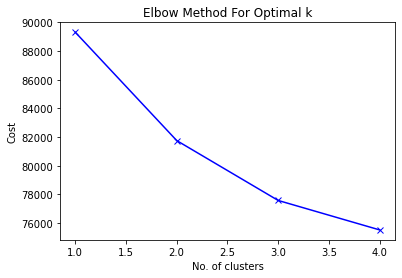

In [10]:
"""
    Elbow method to find optimal K
"""

cost = []

K = range(1,5)

for num_clusters in list(K):

    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)

    kmode.fit_predict(dataset)

    cost.append(kmode.cost_)

    

plt.plot(K, cost, 'bx-')

plt.xlabel('No. of clusters')

plt.ylabel('Cost')

plt.title('Elbow Method For Optimal k')

plt.show()

In [11]:
# standardizing the data
# from sklearn import preprocessing
# from sklearn.cluster import KMeans

In [12]:
dataset.drop(['Device_ID','Device_type',  'Device_model'], axis=1, inplace=True)

In [13]:
dataset.head(10)

,Device_brand,Manufacture_Date,Allocation_Date,device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms)
0,Apple,2019-07-15,2021-08-05,No,No,Yes,Poor,1.60,Poor
1,Apple,2015-04-27,2021-01-22,No,No,Yes,Poor,1.97,Good
2,Nokia,2015-08-31,2021-02-15,Yes,No,Yes,Average,7.53,Average
3,Dell,2018-09-30,2021-08-08,No,No,No,Good,1.62,Good
4,Samsung,2018-10-01,2021-08-09,Yes,No,Yes,Average,3.51,Average
5,Samsung,2014-07-23,2021-05-19,Yes,No,Yes,Good,17.98,Good
6,HP,2014-09-26,2021-05-22,No,Yes,Yes,Average,4.10,Average
7,Nokia,2015-09-19,2021-07-20,No,Yes,No,Average,5.10,Good
8,OnePlus,2014-11-21,2021-06-21,No,No,No,Good,2.63,Average
9,Samsung,2016-06-25,2021-03-31,Yes,No,Yes,Good,4.52,Poor


In [14]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 20, verbose=1)
clusters = kmode.fit_predict(dataset)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1899, cost: 52960.0
Run 1, iteration: 2/100, moves: 25, cost: 52960.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 791, cost: 55336.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2600, cost: 53455.0
Run 3, iteration: 2/100, moves: 12, cost: 53455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 905, cost: 54710.0
Run 4, iteration: 2/100, moves: 1, cost: 54710.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 960, cost: 53674.0
Run 5, iteration: 2/100, moves: 0, cost: 53674.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 748, cost: 53419.0
Init: initiali

array([1, 2, 1, ..., 1, 0, 2], dtype=uint16)

In [15]:
# adding clusters to our dataset
dataset.insert(0, "Clusters", clusters, True)
dataset

,Clusters,Device_brand,Manufacture_Date,Allocation_Date,device_in_use,water_damage,device_responsive,battery_health,Usage(hrs),Latency(ms)
0,1,Apple,2019-07-15,2021-08-05,No,No,Yes,Poor,1.60,Poor
1,2,Apple,2015-04-27,2021-01-22,No,No,Yes,Poor,1.97,Good
2,1,Nokia,2015-08-31,2021-02-15,Yes,No,Yes,Average,7.53,Average
3,2,Dell,2018-09-30,2021-08-08,No,No,No,Good,1.62,Good
4,0,Samsung,2018-10-01,2021-08-09,Yes,No,Yes,Average,3.51,Average
...,...,...,...,...,...,...,...,...,...,...
9995,0,Samsung,2017-01-23,2021-04-13,No,Yes,No,Average,6.60,Poor
9996,0,OnePlus,2018-04-23,2021-04-06,No,Yes,No,Average,2.26,Average
9997,1,Nokia,2015-08-02,2021-06-23,Yes,Yes,Yes,Poor,4.59,Good
9998,0,Apple,2014-08-09,2021-07-30,No,No,Yes,Average,5.11,Poor


Target looks like classification


C:\Users\VAISSHET\Anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[[<Figure size 216x216 with 2 Axes>], None]

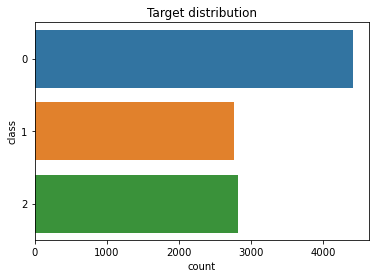

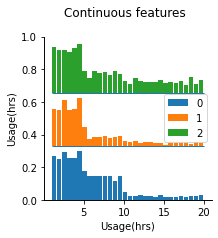

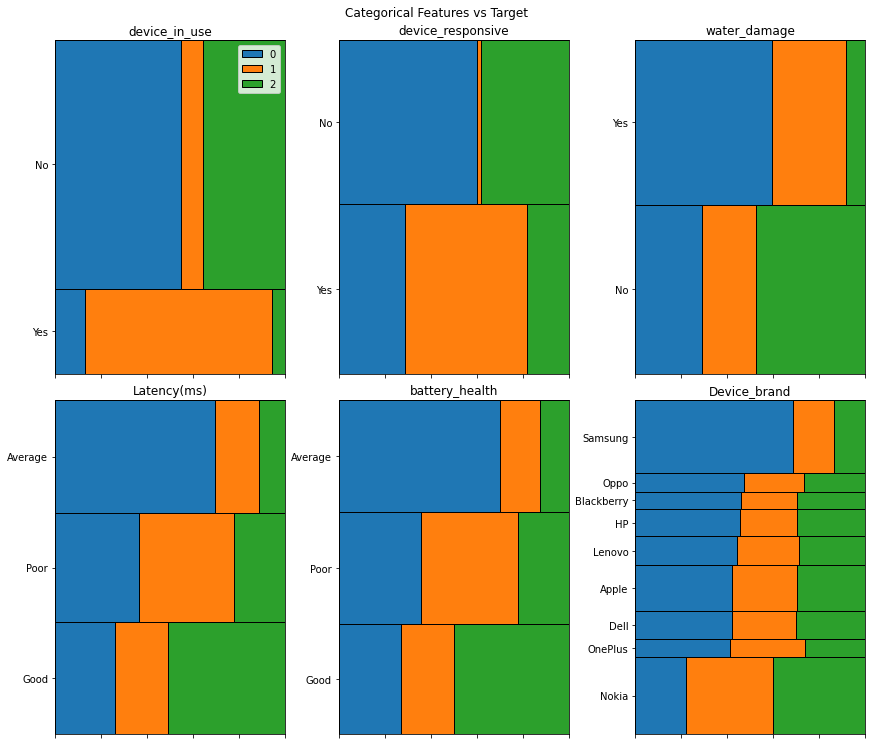

In [16]:
dabl.plot(dataset, target_col="Clusters")